In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
NDVI = pd.read_excel("./Used Datasets/NDvi2011-2020.xlsx")
PET = pd.read_excel("./Used Datasets/pet_2010_2020_Scale0.1.xlsx", infer_datetime_format=True)
SolRad = pd.read_excel("./Used Datasets/Srad2010-20.xlsx")
AET = pd.read_excel("./Used Datasets/aet_2010_2020_Scale0.1.xlsx")
Tmin = pd.read_excel("./Used Datasets/tmin.xlsx")
Tmax = pd.read_excel("./Used Datasets/tmax.xlsx")
co2 = pd.read_csv("./Used Datasets/co2_trend_gl_re.txt", delim_whitespace=True)

In [11]:
PAR = np.array(SolRad.values[8 :, 1], dtype=int)/20
NdviArray = np.array(NDVI.values[: -10, 1], dtype=float)
Tavg = (np.array(Tmin.values[8 :, 1], dtype=float) + np.array(Tmax.values[8 :, 1], dtype=float))/20
Tsday_act = np.array(Tsday.values[:, 1], dtype=float)*0.02 - 273.15
CO2 = co2.values[:, 3]
W = 0.5 + (np.array(AET.values[17 :,1], dtype=int)/np.array(PET.values[17 :, 1], dtype=int))

In [12]:
W_new = np.zeros(W.size*2, dtype=float)
Tavg_new = np.zeros(Tavg.size*2, dtype=float)
PAR_new = np.zeros(PAR.size*2, dtype=float)
for i in range(Tavg.size):
    W_new[2*i] = W[i]
    Tavg_new[2*i] = Tavg[i]
    PAR_new[i*2] = PAR[i]
    if 2*(i+1)<Tavg_new.size:
        Tavg_new[2*i+1] = (Tavg[i]+Tavg[i+1])/2
        W_new[2*i+1] = (W[i]+W[i+1])/2
        PAR_new[2*i+1] = (PAR[i]+PAR[i+1])/2
Tavg_new[-1] = (Tavg_new[-24]+Tavg_new[-48])/2
W_new[-1] = (W_new[-24]+W_new[-48])/2
PAR_new[-1] = (PAR_new[-24]+PAR_new[-48])/2

W_new = np.zeros(W.size*2, dtype=float)
Tavg_new=np.zeros(Tavg.size*2, dtype=float)
PAR_new = np.zeros(PAR.size*2, dtype=float)
for i in range(Tavg.size):
    Tavg_new[2*i]=Tavg[i]
    Tavg_new[2*i+1]=Tavg[i]
    W_new[2*i] = W[i]
    W_new[2*i+1] = W[i]
    PAR_new[i*2] = PAR[i]
    PAR_new[i*2+1] = PAR[i]

In [13]:
Topt = Tavg_new[-6]
Tmon = Tavg_new
T1 = 0.8 + 0.02*Topt - 0.0005*Topt**2
T2 = 1.185/((1+np.exp(0.2*(Topt-10-Tmon)))*(1+np.exp(0.3*(-Topt-10+Tmon))))
LUE = 2.5*T1*T2*W_new
NPP = NdviArray*PAR_new*LUE
CO2_trend = co2.values[:, 4]

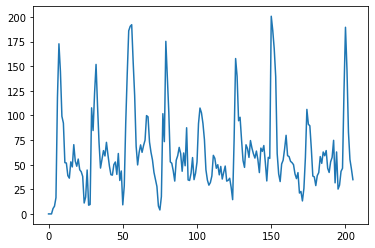

In [14]:
plt.plot(NPP)

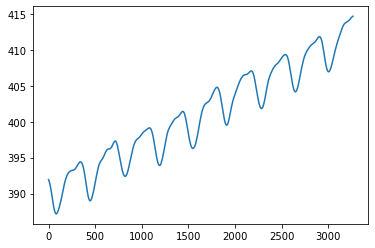

In [15]:
plt.plot(CO2)

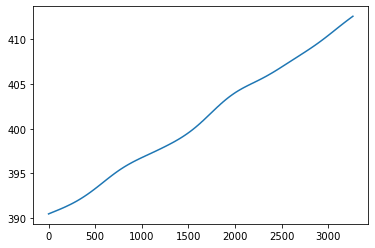

In [16]:
plt.plot(CO2_trend)